In [23]:
!pip install torch
!pip install Image
!pip install torchvision
!pip install pycocotools

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached pycocotools-2.0.6.tar.gz (24 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pycocotools: filename=pycocotools-2.0.6-cp311-cp311-win_amd64.whl size=85214 sha256=843901d5ffd0a9214d9a15c7534eaaa136167386f9cb5bdf78fdbbd70aaf62a1
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\ad\ca\ea\fb115e04c841c3f71fd369b7d9805a43a5193f4f9251bed0ec
Successfully built pycocotools



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import torch
import torchvision
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [3]:
def load_and_preprocess_image(image_path):
    image = Image.open(image_path)
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    input_image = transform(image).unsqueeze(0)
    return input_image


In [4]:
def predict_objects(image_path, threshold=0.5):
    input_image = load_and_preprocess_image(image_path)
    with torch.no_grad():
        output = model(input_image)
    
    boxes = output[0]['boxes']
    labels = output[0]['labels']
    scores = output[0]['scores']
    
    # Filter detections above the given threshold
    filtered_indices = [i for i in range(len(scores)) if scores[i] > threshold]
    boxes = boxes[filtered_indices]
    labels = labels[filtered_indices]
    scores = scores[filtered_indices]
    
    return boxes, labels, scores

In [5]:
def visualize_predictions(image_path, boxes, labels, scores):
    image = Image.open(image_path)
    plt.imshow(image)
    ax = plt.gca()

    for box, label, score in zip(boxes, labels, scores):
        box = box.tolist()
        label = label.item()
        score = score.item()
        ax.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], 
                                   fill=False, edgecolor='red', linewidth=2))
        label_text = f"Label: {label}, Score: {score:.2f}"
        plt.text(box[0], box[1], label_text, bbox=dict(facecolor='white', alpha=0.5))

    plt.axis('off')
    plt.show()

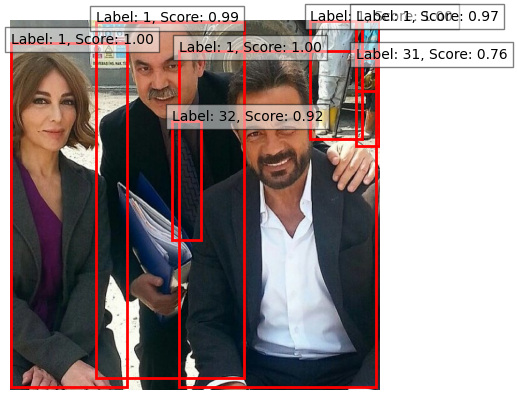

In [7]:
image_path = 'BS_55hTlNyy.jpg'
boxes, labels, scores = predict_objects(image_path)
visualize_predictions(image_path, boxes, labels, scores)

In [9]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt

# Load the pretrained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load the COCO class names
class_names = torchvision.datasets.CocoDetection.class_names

# Load and preprocess image function
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image_tensor = F.to_tensor(image).unsqueeze(0)
    return image_tensor

# Predict objects function
def predict_objects(image_path, threshold=0.5):
    input_image = load_and_preprocess_image(image_path)
    with torch.no_grad():
        output = model(input_image)
    
    boxes = output[0]['boxes']
    labels = output[0]['labels']
    scores = output[0]['scores']
    
    # Filter detections above the given threshold
    filtered_indices = [i for i in range(len(scores)) if scores[i] > threshold]
    boxes = boxes[filtered_indices]
    labels = labels[filtered_indices]
    scores = scores[filtered_indices]
    
    return boxes, labels, scores

# Visualize predictions function
def visualize_predictions(image_path, boxes, labels, scores, class_names):
    image = Image.open(image_path)
    plt.imshow(image)
    ax = plt.gca()

    for idx, (box, label, score) in enumerate(zip(boxes, labels, scores)):
        box = box.tolist()
        label = label.item()
        score = score.item()
        ax.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], 
                                   fill=False, edgecolor='red', linewidth=2))
        label_text = f"{idx + 1}: {class_names[label]} ({score:.2f})"
        plt.text(box[0], box[1], label_text, bbox=dict(facecolor='white', alpha=0.5))

    plt.axis('off')
    plt.show()

# Image path
image_path = 'BS_55hTlNyy.jpg'

# Predict objects and visualize predictions
boxes, labels, scores = predict_objects(image_path)
visualize_predictions(image_path, boxes, labels, scores, class_names)

AttributeError: type object 'CocoDetection' has no attribute 'class_names'

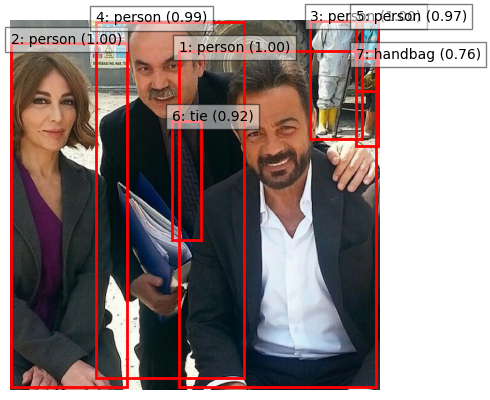

In [10]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt

# Load the pretrained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# COCO class names (80 classes)
class_names = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
    'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
    'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A',
    'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase',
    'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
    'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A',
    'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse',
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors',
    'teddy bear', 'hair drier', 'toothbrush'
]

# Load and preprocess image function
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image_tensor = F.to_tensor(image).unsqueeze(0)
    return image_tensor

# Predict objects function
def predict_objects(image_path, threshold=0.5):
    input_image = load_and_preprocess_image(image_path)
    with torch.no_grad():
        output = model(input_image)
    
    boxes = output[0]['boxes']
    labels = output[0]['labels']
    scores = output[0]['scores']
    
    # Filter detections above the given threshold
    filtered_indices = [i for i in range(len(scores)) if scores[i] > threshold]
    boxes = boxes[filtered_indices]
    labels = labels[filtered_indices]
    scores = scores[filtered_indices]
    
    return boxes, labels, scores

# Visualize predictions function
def visualize_predictions(image_path, boxes, labels, scores, class_names):
    image = Image.open(image_path)
    plt.imshow(image)
    ax = plt.gca()

    for idx, (box, label, score) in enumerate(zip(boxes, labels, scores)):
        box = box.tolist()
        label = label.item()
        score = score.item()
        ax.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], 
                                   fill=False, edgecolor='red', linewidth=2))
        label_text = f"{idx + 1}: {class_names[label]} ({score:.2f})"
        plt.text(box[0], box[1], label_text, bbox=dict(facecolor='white', alpha=0.5))

    plt.axis('off')
    plt.show()

# Image path
image_path = 'BS_55hTlNyy.jpg'

# Predict objects and visualize predictions
boxes, labels, scores = predict_objects(image_path)
visualize_predictions(image_path, boxes, labels, scores, class_names)


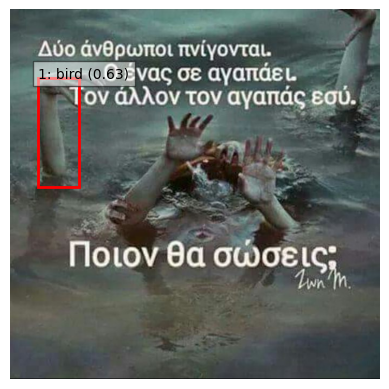

In [6]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt

# Load the pretrained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# COCO class names (80 classes)
class_names = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
    'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
    'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat',
    'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase',
    'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
    'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror',
    'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse',
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors',
    'teddy bear', 'hair drier', 'toothbrush', 'hair brush'
]

# Load and preprocess image function
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image_tensor = F.to_tensor(image).unsqueeze(0)
    return image_tensor

# Predict objects function
def predict_objects(image_path, threshold=0.5):
    input_image = load_and_preprocess_image(image_path)
    with torch.no_grad():
        output = model(input_image)
    
    boxes = output[0]['boxes']
    labels = output[0]['labels']
    scores = output[0]['scores']
    
    # Filter detections above the given threshold
    filtered_indices = [i for i in range(len(scores)) if scores[i] > threshold]
    boxes = boxes[filtered_indices]
    labels = labels[filtered_indices]
    scores = scores[filtered_indices]
    
    return boxes, labels, scores

# Visualize predictions function
def visualize_predictions(image_path, boxes, labels, scores, class_names):
    image = Image.open(image_path)
    plt.imshow(image)
    ax = plt.gca()

    for idx, (box, label, score) in enumerate(zip(boxes, labels, scores)):
        box = box.tolist()
        label = label.item()
        score = score.item()
        ax.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], 
                                   fill=False, edgecolor='red', linewidth=2))
        label_text = f"{idx + 1}: {class_names[label]} ({score:.2f})"
        plt.text(box[0], box[1], label_text, bbox=dict(facecolor='white', alpha=0.5))

    plt.axis('off')
    plt.show()

# Image path
image_path = 'BDtFNxaRJS8.jpg'

# Predict objects and visualize predictions
boxes, labels, scores = predict_objects(image_path)
visualize_predictions(image_path, boxes, labels, scores, class_names)


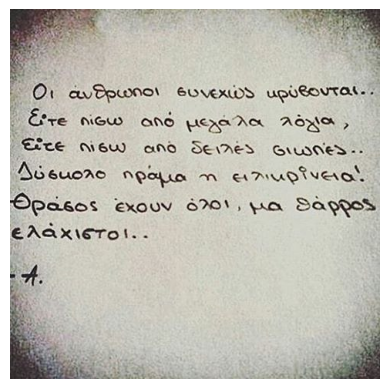

In [8]:
# Image path
image_path = 'BDvBiStrC8l.jpg'

# Predict objects and visualize predictions
boxes, labels, scores = predict_objects(image_path)
visualize_predictions(image_path, boxes, labels, scores, class_names)

In [28]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image

# Load the pretrained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# COCO class names (80 classes)
class_names = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
    'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
    'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat',
    'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase',
    'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
    'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror',
    'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse',
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors',
    'teddy bear', 'hair drier', 'toothbrush', 'hair brush'
]

# Load and preprocess image function
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image_tensor = F.to_tensor(image).unsqueeze(0)
    return image_tensor

# Predict objects function
def predict_objects(image_path, threshold=0.5):
    input_image = load_and_preprocess_image(image_path)
    with torch.no_grad():
        output = model(input_image)
    
    boxes = output[0]['boxes']
    labels = output[0]['labels']
    scores = output[0]['scores']
    
    # Filter detections above the given threshold
    filtered_indices = [i for i in range(len(scores)) if scores[i] > threshold]
    boxes = boxes[filtered_indices]
    labels = labels[filtered_indices]
    scores = scores[filtered_indices]
    
    return boxes, labels, scores

# Get the class names for detected labels
def get_detected_class_names(labels, class_names):
    return [class_names[label] for label in labels]

# Image path
image_path = 'BS_XnPEBDi9.jpg'

# Predict objects
boxes, labels, scores = predict_objects(image_path)

# Get detected class names
detected_class_names = get_detected_class_names(labels, class_names)

# Create and print the list
detected_list = [
    f"{idx + 1}: {class_name} ({score:.2f})"
    for idx, (class_name, score) in enumerate(zip(detected_class_names, scores))
]

for item in detected_list:
    print(item)


1: person (0.99)
2: person (0.97)
3: horse (0.96)
4: tie (0.75)
5: backpack (0.61)
6: horse (0.56)
7: person (0.53)


In [18]:
# Image path
image_path = 'BS_gHQpl0sg.jpg'

# Predict objects
boxes, labels, scores = predict_objects(image_path)

# Get detected class names
detected_class_names = get_detected_class_names(labels, class_names)

# Create and print the list
detected_list = [
    f"{idx + 1}: {class_name} ({score:.2f})"
    for idx, (class_name, score) in enumerate(zip(detected_class_names, scores))
]

for item in detected_list:
    print(item)

1: person (0.99)
2: person (0.99)
3: person (0.98)
4: motorcycle (0.97)
5: person (0.92)
6: person (0.88)
7: person (0.85)
8: person (0.84)
9: person (0.83)
10: person (0.79)
11: person (0.75)
12: person (0.75)
13: person (0.74)
14: person (0.73)
15: person (0.70)
16: chair (0.64)
17: person (0.59)
18: person (0.58)
19: person (0.56)


In [25]:
# Image path
image_path = 'BS0tD_fjj4a.jpg'

# Predict objects
boxes, labels, scores = predict_objects(image_path)

# Get detected class names
detected_class_names = get_detected_class_names(labels, class_names)

# Create and print the list
detected_list = [
    f"{idx + 1}: {class_name} ({score:.2f})"
    for idx, (class_name, score) in enumerate(zip(detected_class_names, scores))
]

for item in detected_list:
    print(item)

1: person (1.00)
2: person (1.00)
3: person (0.99)
4: person (0.99)
5: person (0.99)
6: frisbee (0.99)
7: person (0.98)
8: person (0.96)
9: person (0.96)
10: person (0.91)
11: person (0.90)
12: person (0.90)
13: person (0.85)
14: person (0.69)
15: person (0.66)
16: person (0.63)
17: person (0.60)
18: person (0.55)
19: person (0.54)


#### Contains text?

In [13]:
!pip install easyocr

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import easyocr

def detect_text(image_path, confidence_threshold=0.5, language='en'):
    reader = easyocr.Reader([language])
    result = reader.readtext(image_path, detail=0)

    detected_text = []
    for text in result:
        if text.strip() and text[1] >= confidence_threshold:
            detected_text.append(text[0])

    return detected_text

In [15]:
# Replace 'image_path' with the path to your image file
image_path = 'BDtOpGExJai.jpg'
detected_text = detect_text(image_path)

if detected_text:
    print("Detected Text:")
    for text in detected_text:
        print(text)
else:
    print("No text detected in the image.")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'

memes

In [17]:
!pip install pytesseract
!pip install pillow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pytesseract
from PIL import Image

def has_text(image_path, threshold=5):
    try:
        image = Image.open(image_path)
        text = pytesseract.image_to_string(image)
        text = text.strip()

        # Compare the length of extracted text to a threshold
        if len(text) >= threshold:
            return True
        else:
            return False

    except Exception as e:
        print("Error:", e)
        return False

# Provide the path to the image you want to check
image_path = "BDtOpGExJai.jpg"
if has_text(image_path):
    print("The image contains text.")
else:
    print("The image does not contain text.")


Error: tesseract is not installed or it's not in your PATH. See README file for more information.
The image does not contain text.


In [4]:
# Import necessary libraries
import numpy as np
from PIL import Image

class NIMA:
    def __init__(self):
        # Initialize NIMA model and other necessary components
        pass
    
    def assess_aesthetic(self, image):
        # Simulate assessing image aesthetic using NIMA model
        aesthetic_score = self._get_aesthetic_score(image)
        return aesthetic_score
    
    def assess_technical_quality(self, image):
        # Simulate assessing image technical quality using NIMA model
        technical_score = self._get_technical_score(image)
        return technical_score
    
    def _get_aesthetic_score(self, image):
        # Simulate NIMA's aesthetic scoring process
        aesthetic_score = 0.8  # Replace with actual scoring logic
        return aesthetic_score
    
    def _get_technical_score(self, image):
        # Simulate NIMA's technical quality scoring process
        technical_score = 0.6  # Replace with actual scoring logic
        return technical_score

# Simulate image loading
def load_image(image_path):
    image = Image.open(image_path)
    image = np.array(image)
    return image

# Example usage
if __name__ == "__main__":
    nima_model = NIMA()
    
    image_path = "BDtOpGExJai.jpg"
    image = load_image(image_path)
    
    aesthetic_score = nima_model.assess_aesthetic(image)
    technical_score = nima_model.assess_technical_quality(image)
    
    print(f"Image Aesthetic Score: {aesthetic_score}")
    print(f"Image Technical Quality Score: {technical_score}")


Image Aesthetic Score: 0.8
Image Technical Quality Score: 0.6
